# Import Libraries

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

# Data Pre-processing

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# our values are from range 0-255

# now bring these values in range(0,1) i.e plain normalisation. This is not good an approach as the data must be from 0 and we should know the highest value
# else normalisation can be done using mean and standard deviation
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255

# reshaping from (60000, (28,28)) to (60000, 784)
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

11493376/11490434 [==============================] - 0s 0us/step


# Adding noise

In [3]:
noisyy = np.random.rand(60000, 784)
noisyyy = noisyy * 0.9   # to ensure that value do not become tooo big or tooo small
print("noisyy:", noisyy)
print("\nnoisyy shape :", noisyy.shape)
print("\nnoisyyy:", noisyyy)

noisyy: [[0.89863405 0.06550661 0.64978824 ... 0.38104179 0.46203908 0.6884774 ]
 [0.87076051 0.42700524 0.10457492 ... 0.49895701 0.40249401 0.61518672]
 [0.80308731 0.4189704  0.92944998 ... 0.4171419  0.66271767 0.30170172]
 ...
 [0.99962051 0.51958166 0.52055928 ... 0.08691144 0.0548623  0.08471906]
 [0.19051239 0.21233854 0.48194535 ... 0.53510833 0.24362439 0.01318479]
 [0.00821844 0.71592464 0.06155406 ... 0.78045993 0.27927043 0.45454115]]

noisyy shape : (60000, 784)

noisyyy: [[0.80877065 0.05895595 0.58480941 ... 0.34293761 0.41583517 0.61962966]
 [0.78368446 0.38430471 0.09411743 ... 0.44906131 0.3622446  0.55366805]
 [0.72277858 0.37707336 0.83650498 ... 0.37542771 0.59644591 0.27153155]
 ...
 [0.89965846 0.46762349 0.46850335 ... 0.0782203  0.04937607 0.07624716]
 [0.17146115 0.19110469 0.43375082 ... 0.48159749 0.21926195 0.01186631]
 [0.00739659 0.64433218 0.05539865 ... 0.70241394 0.25134339 0.40908704]]


In [4]:
X_train_noisy = X_train + np.random.rand(60000, 784)*0.9
X_test_noisy = X_test + np.random.rand(10000, 784)*0.9  

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
np.clip(X_test_noisy, 0., 1.,out=X_test_noisy)

array([[0.59973222, 0.87064736, 0.46555795, ..., 0.37546588, 0.23878768,
        0.03541325],
       [0.66537627, 0.8076956 , 0.58353241, ..., 0.29440334, 0.54020864,
        0.31181173],
       [0.54348646, 0.21560987, 0.41240999, ..., 0.34852673, 0.44226101,
        0.64755287],
       ...,
       [0.68711493, 0.1993541 , 0.24838351, ..., 0.70200476, 0.64026429,
        0.67022366],
       [0.10241927, 0.51234545, 0.3459789 , ..., 0.8082321 , 0.25994307,
        0.31416582],
       [0.65316488, 0.14822727, 0.71436187, ..., 0.73575705, 0.043953  ,
        0.33378338]])

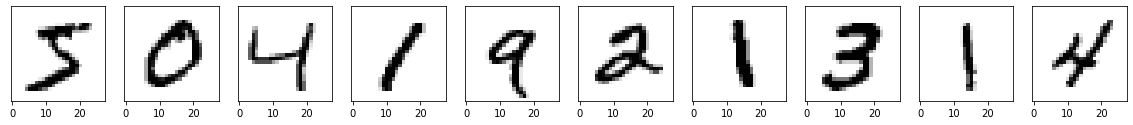

In [5]:
def plot(x, p, labels=False):
  plt.figure(figsize=(20, 2))
  # we are taking 10 images at a time 
  for i in range(10):
    plt.subplot(1, 10, i+1) # 1 row, 10 column, i+1 - index of image which starts from 1 always
    plt.imshow(x[i].reshape(28, 28), cmap='binary')
    # plt.xticks([]) # to blank specific points on x-axis
    plt.yticks([]) # to blank specific points on y-axis
    # if predictions have been done 
    if labels:
      plt.xlabel(np.argmax(p[i]))
  plt.show()      

plot(X_train, None) #Without noise

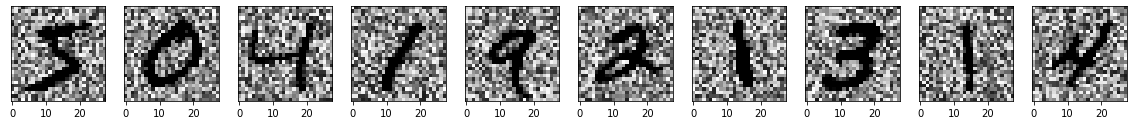

In [6]:
plot(X_train_noisy, None) #After adding noise

# Without Auto-encoder

In [7]:
classifier = Sequential([
                         Dense(256, activation='relu', input_shape=(784,)),
                         Dense(256, activation='relu'),
                         Dense(10, activation='softmax')
])

classifier.compile(
    optimizer='adam',
    # if our labels were encoded in onehotencoding then we could use loss='categorical_crossentropy'
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [8]:
print(Y_train.shape)
# training model for 3 epochs 
classifier.fit(X_train, Y_train, batch_size=512, epochs=3) # batch size is 512 so it will run for 60000/512 = 118(approx) times

(60000,)
Epoch 1/3
118/118 [==============================] - 1s 9ms/step - loss: 0.4183 - accuracy: 0.8869
Epoch 2/3
118/118 [==============================] - 1s 9ms/step - loss: 0.1492 - accuracy: 0.9566
Epoch 3/3
118/118 [==============================] - 1s 10ms/step - loss: 0.1019 - accuracy: 0.9704


In [9]:
loss, accuracy = classifier.evaluate(X_test, Y_test,batch_size=32) #default batch size = 32. Hence 32*313 is just bigger than 10000 so it ran for 313 cases
print(accuracy) #without noise

313/313 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9703
0.970300018787384


In [10]:
loss_noisy, accuracy_noisy = classifier.evaluate(X_test_noisy, Y_test)
print(accuracy_noisy) #with noise

313/313 [==============================] - 0s 2ms/step - loss: 9.9128 - accuracy: 0.1572
0.15719999372959137


# Building the Auto-encoder

In [11]:
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image) # 64 is taken to reduce the dimensionality
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [12]:
autoencoder.fit(
    X_train_noisy, X_train, epochs=100, 
    batch_size=512, validation_split=0.2, verbose=False, 
    callbacks=[
               # if validation loss does not decrease for 5 epochs then our model will stop the training
               EarlyStopping(monitor='val_loss', patience=5),
               # on_epoch_end - means lambda function will call on the end of each epoch 
               LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print("Training is complete!")

0.258 _ 0.224 _ 0.196 _ 0.180 _ 0.169 _ 0.160 _ 0.152 _ 0.146 _ 0.140 _ 0.135 _ 0.132 _ 0.128 _ 0.126 _ 0.123 _ 0.121 _ 0.119 _ 0.118 _ 0.116 _ 0.115 _ 0.114 _ 0.113 _ 0.112 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.104 _ 0.104 _ 0.104 _ 0.105 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _  _ 
Training is complete!


# Denoised images

In [13]:
predictions = autoencoder.predict(X_test_noisy)

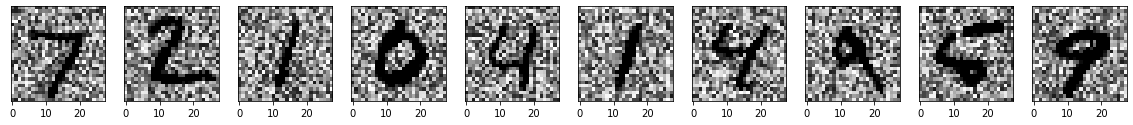

In [14]:
plot(X_test_noisy, None)

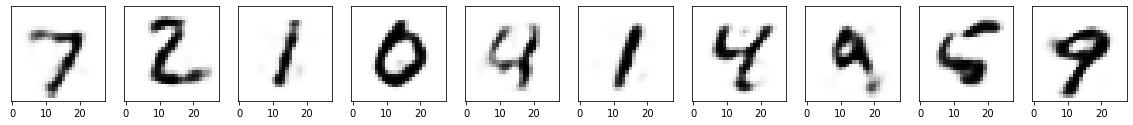

In [15]:
plot(predictions, None)

In [16]:
loss, accuracy = classifier.evaluate(X_test_noisy, Y_test)
print("For noisy data - ")
print(accuracy, end="\n\n")

loss, accuracy = classifier.evaluate(predictions, Y_test)
print("For denoised data - ")
print(accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 9.9128 - accuracy: 0.1572
For noisy data - 
0.15719999372959137

313/313 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9416
For denoised data - 
0.9416000247001648
